In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [41]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img(r'C:\Users\Biswajeet\Downloads\image_deep\train\cats\download.jpg')  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r'C:\Users\Biswajeet\Downloads\preview_image', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [43]:
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
batch_size = 16
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Biswajeet\Downloads\image_deep\train' ,  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\Biswajeet\Downloads\image_deep\validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 3 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [45]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try2.h5')  

Epoch 1/4
125/125 [==============================] - 20s 162ms/step - loss: 0.0935 - acc: 0.9493
Epoch 2/4
125/125 [==============================] - 19s 155ms/step - loss: 0.0450 - acc: 0.9947
Epoch 3/4
125/125 [==============================] - 20s 158ms/step - loss: 0.0832 - acc: 0.9920
Epoch 4/4
125/125 [==============================] - 20s 159ms/step - loss: 6.8507e-04 - acc: 1.0000


In [ ]:
#model.load_weights('first_try.h5')

In [46]:
img = load_img(r'C:\Users\Biswajeet\Downloads\image_deep\train\cats\download.jpg')  
x = img_to_array(img.resize([150,150])) 
x = x.reshape((1,) + x.shape) 

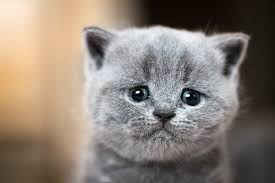

In [47]:
img

In [48]:
if (model.predict_classes(x)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a Cat


In [49]:
model.predict_classes(x)

array([[0]])